In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [128]:
def dataimporter(filename,header=55):
    data = pd.read_csv(filename, header=header)
    nummer = data.to_numpy()
    nummerdata = np.asarray(nummer[:-1,:], dtype="float")
    return nummerdata
def plotter(ax,data,zo,colour,label):
    ax.plot(data[:,0],data[:,1],zorder=zo, lw = 4, color = colour, label =label)
    ax.fill_between(data[:,0],data[:,1],zorder=zo, color = colour)
   
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def data_integration(data,under=2.2,over=2.6,avgunder=2.65,avgover=2.8 ):
    array = np.array([])
    for i in (data):
        intunder = np.where(i[:,0]==find_nearest(i[:,0],under))
        intover = np.where(i[:,0]==find_nearest(i[:,0],over))
        placeunder = np.where(i[:,0]==find_nearest(i[:,0],avgunder))
        placeover = np.where(i[:,0]==find_nearest(i[:,0],avgover))
        
        intunder = np.reshape(intunder,-1)
        intover = np.reshape(intover,-1)
        placeunder = np.reshape(placeunder, -1)
        placeover = np.reshape(placeover, -1)

        # i[:,1] = i[:,1]-np.average(i[placeunder[0]:placeover[0],1])

        top1 = np.sum(i[intunder[0]:intover[0],1])
        array = np.append(array,top1)
    return array

def predict(signal,c):
    return c[0]*signal + c[1]


In [11]:
data_A10_1 = dataimporter("Spectrum_A10_Area_1.txt",46)
data_B15_1 = dataimporter("Spectrum_B15_Area_1.txt",47)
data_B15_2 = dataimporter("Spectrum_B15_Area_2.txt",47)
data_C10_1 = dataimporter("Spectrum_C10_Area_1.txt",45)
data_C10_2 = dataimporter("Spectrum_C10_Area_2.txt",47)
data_D9_1 = dataimporter("Spectrum_D9_Area_1.txt",47)
data_E7_1 = dataimporter("Spectrum_E7_Area_1.txt",46)
data_N8_1 = dataimporter("Spectrum_N8_Area_1.txt",46)
data_N15_1 = dataimporter("Spectrum_N15_Area_1.txt",46)

FileNotFoundError: [Errno 2] No such file or directory: 'Spectrum_A10_Area_1.txt'

In [132]:
A10_15keV_10 = dataimporter("Thick 1/A10_15keV_10.txt",46)
A10_15keV_10_2 = dataimporter("Thick 1/A10_15keV_10_02.txt",46)
A10_10keV_10 = dataimporter("Thick 1/A10_10keV_10.txt",46)
A10_5keV_10 = dataimporter("Thick 1/A10_5keV_10.txt",46)
B15_15keV_10 = dataimporter("Thick 1/B15_15keV_10.txt",46)
B15_10keV_10 = dataimporter("Thick 1/B15_10keV_10.txt",46)
B15_5keV_10 = dataimporter("Thick 1/B15_5keV_10.txt",46)
C10_15keV_10 = dataimporter("Thick 1/C10_15keV_10.txt",46)
C10_10keV_10 = dataimporter("Thick 1/C10_10keV_10.txt",46)
C10_5keV_10 = dataimporter("Thick 1/C10_5keV_10.txt",46)
D9_15keV_10 = dataimporter("Thick 1/D9_15keV_10.txt",46)
D9_10keV_10 = dataimporter("Thick 1/D9_10keV_10.txt",46)
D9_5keV_10 = dataimporter("Thick 1/D9_5keV_10.txt",46)
E7_10keV_10 = dataimporter("Thick 1/E7_10keV_10.txt",46)
N15_10keV_10 = dataimporter("Thick 1/N15_10keV_10.txt",46)
N15_15keV_10 = dataimporter("Thick 1/N15_15keV_10.txt",46)
N15_5keV_10 = dataimporter("Thick 1/N15_5keV_10.txt",46)

In [133]:
A10_15keV_1 = dataimporter("measurements 2/A10_15keV_1.txt")
A10_15keV_2 = dataimporter("measurements 2/A10_15keV_2.txt")
A10_15keV_3 = dataimporter("measurements 2/A10_15keV_3.txt")

B15_15keV_1 = dataimporter("measurements 2/B15_15keV_1.txt")
B15_15keV_2 = dataimporter("measurements 2/B15_15keV_2.txt")
B15_15keV_3 = dataimporter("measurements 2/B15_15keV_3.txt")

C10_15keV_1 = dataimporter("measurements 2/C10_15keV_1.txt")
C10_15keV_2 = dataimporter("measurements 2/C10_15keV_2.txt")
C10_15keV_3 = dataimporter("measurements 2/C10_15keV_3.txt")

D9_15keV_1 = dataimporter("measurements 2/D9_15keV_1.txt")
D9_15keV_2 = dataimporter("measurements 2/D9_15keV_2.txt")
D9_15keV_3 = dataimporter("measurements 2/D9_15keV_3.txt")

E7_15keV_1 = dataimporter("measurements 2/E7_15keV_1.txt")
E7_15keV_2 = dataimporter("measurements 2/E7_15keV_2.txt")
E7_15keV_3 = dataimporter("measurements 2/E7_15keV_3.txt")

N8_15keV_1 = dataimporter("measurements 2/N8_15keV_1.txt")
N8_15keV_2 = dataimporter("measurements 2/N8_15keV_2.txt")
N8_15keV_3 = dataimporter("measurements 2/N8_15keV_3.txt")

G8_15keV_1 = dataimporter("measurements 2/G8_15keV_1.txt")
G8_15keV_2 = dataimporter("measurements 2/G8_15keV_2.txt")
G8_15keV_3 = dataimporter("measurements 2/G8_15keV_3.txt")

H9_15keV_1 = dataimporter("measurements 2/H9_15keV_1.txt")
H9_15keV_2 = dataimporter("measurements 2/H9_15keV_2.txt")
H9_15keV_3 = dataimporter("measurements 2/H9_15keV_3.txt")

H12_15keV_1 = dataimporter("measurements 2/H12_15keV_1.txt")
H12_15keV_2 = dataimporter("measurements 2/H12_15keV_2.txt")
H12_15keV_3 = dataimporter("measurements 2/H12_15keV_3.txt")

N15_15keV_1 = dataimporter("measurements 2/N15_15keV_1.txt")
N15_15keV_2 = dataimporter("measurements 2/N15_15keV_2.txt")
N15_15keV_3 = dataimporter("measurements 2/N15_15keV_3.txt")

data_080824 = np.array([D9_15keV_1,D9_15keV_2,D9_15keV_3,N8_15keV_1,N8_15keV_2,N8_15keV_3,A10_15keV_1,A10_15keV_2,A10_15keV_3,B15_15keV_1,B15_15keV_2,B15_15keV_3,C10_15keV_1,C10_15keV_2,C10_15keV_3,N15_15keV_1,N15_15keV_2,N15_15keV_3,E7_15keV_1,E7_15keV_2,E7_15keV_3,G8_15keV_1,G8_15keV_2,G8_15keV_3,H9_15keV_1,H9_15keV_2,H9_15keV_3,H12_15keV_1,H12_15keV_2,H12_15keV_3])

In [70]:
data15 = [A10_15keV_10,B15_15keV_10,C10_15keV_10,D9_15keV_10,N15_15keV_10]
data10 = [A10_10keV_10,B15_10keV_10,C10_10keV_10,D9_10keV_10,N15_10keV_10]

[2547.66666667 2502.66666667 2448.66666667]
[46.73505757 45.54941981 44.1266545 ]


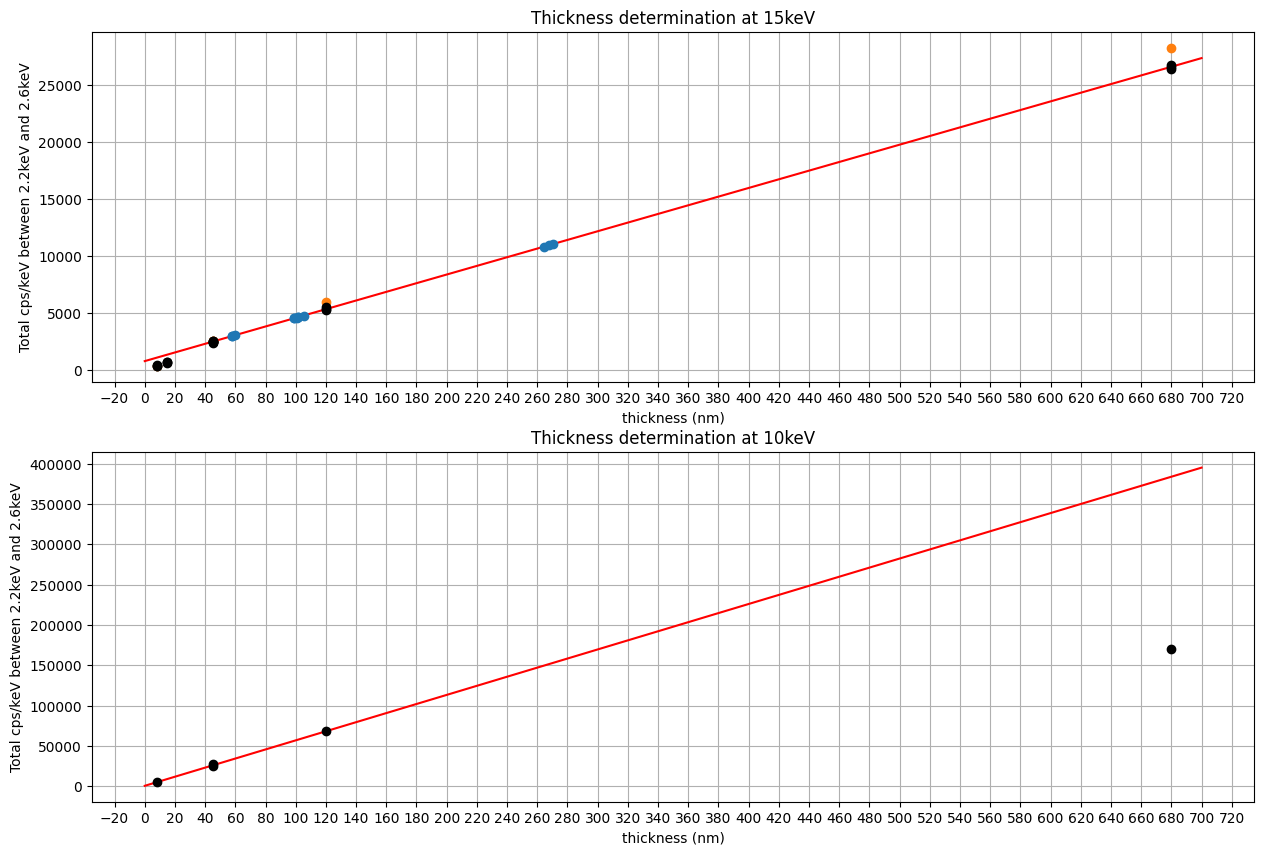

In [126]:
# thickness = np.array([45,45,12,8,480,15,120,680])
# thicknessfit = np.array([45,45,12,8,15,120,680])
thicknessfit15 = np.array([680,45,45,8,120])
thicknessfit10 = np.array([680,45,45,8,120])
# thicknessfit5 = np.array([680,45,45,8,120])






# array = np.array([])
# arrayfit = np.array([])
# arrayfit15 = np.array([])
# arrayfit10 = np.array([])
# arrayfit5 = np.array([])

# for i in ([data_C10_10,data_B15_1,data_B15_2,data_D9_1,data_E7_1,data_N8_1,data_N15_1,data_A10_1]):
#     array = np.append(array,data_integration(i))
    
# for i in ([data_C10_10,data_B15_1,data_B15_2,data_D9_1,data_N8_1,data_N15_1,data_A10_1]):
#     arrayfit = np.append(arrayfit,data_integration(i))
    
# for i in ([A10_15keV_10,B15_15keV_10,C10_15keV_10,D9_15keV_10,N15_15keV_10]):
#     arrayfit15 = np.append(arrayfit15,data_integration(i))

# for i in ([A10_10keV_10,B15_10keV_10,C10_10keV_10,D9_10keV_10,N15_10keV_10]):
#     arrayfit10 = np.append(arrayfit10,data_integration(i))

# for i in ([A10_5keV_10,B15_5keV_10,C10_5keV_10,D9_5keV_10,N15_5keV_10]):
#     arrayfit5 = np.append(arrayfit5,data_integration(i))

# con_fit_15 = np.polyfit(thicknessfit15,arrayfit15,1)
# con_fit_10 = np.polyfit(thicknessfit10[1:],arrayfit10[1:],1)
# con_fit_5 = np.polyfit(thicknessfit5[1:],arrayfit5[1:],1)
# con15 = np.polyfit(arrayfit15,thicknessfit15,1)
# con10 = np.polyfit(arrayfit10[1:3],thicknessfit10[1:3],1)



thi = np.linspace(0,700,1000)

thick = [8,8,8,15,15,15,680,680,680,45,45,45,45,45,45,120,120,120]

spec = data_integration(data_080824[:len(thick)])

spec_old_15 = data_integration(data15)
spec_old_10 = data_integration(data10)

con10 = np.polyfit(thicknessfit10[1:],spec_old_10[1:],1)

con = np.polyfit(thick[6:],spec[6:],1)
conp = np.polyfit(spec[6:],thick[6:],1)

specp = data_integration(data_080824[len(thick):])
thickp = predict(specp,conp)


fig, ax = plt.subplots(2)
fig.set_size_inches(15,10)



print(data_integration(data_080824[9:12]))
print(predict(data_integration(data_080824[9:12]),conp))

ax[0].scatter(thick,spec,color="black",zorder = 4)
ax[0].scatter(thickp,specp,zorder = 4)
ax[0].plot(thi,con[0]*thi + con[1], color= "red",zorder = 2)
ax[0].scatter(thicknessfit15,spec_old_15/10,zorder = 3)

ax[1].scatter(thicknessfit10,spec_old_10,color= "black",zorder = 4)
ax[1].plot(thi,con10[0]*thi+con10[1],color = "red",zorder = 2)

for i in range(len(ax)):
    ax[i].set_xlabel("thickness (nm)")
    ax[i].set_ylabel("Total cps/keV between 2.2keV and 2.6keV")
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(40))
    ax[i].grid(zorder=1)
ax[0].set_title("Thickness determination at 15keV")
ax[1].set_title("Thickness determination at 10keV")
# ax[0].set_xlim([])
plt.show()

NameError: name 'data_N15_1' is not defined

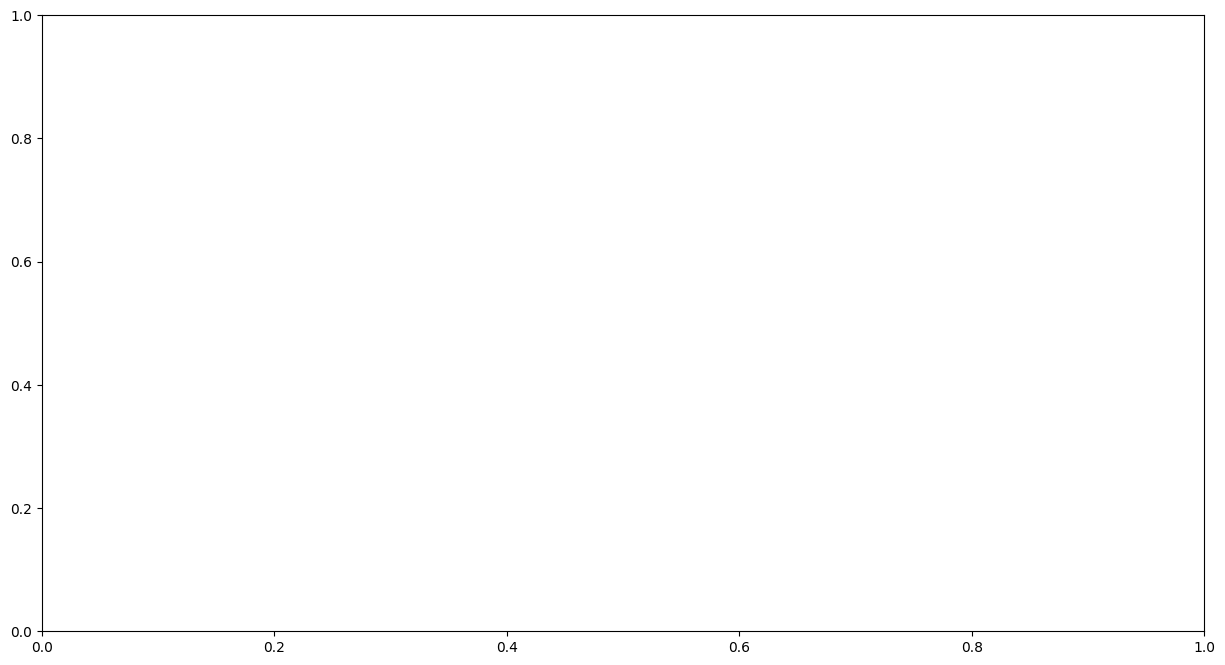

In [65]:
# data = dataimporter("Thicker part Flake 2.txt")
# data2 = dataimporter("Thin part Flake 2 new.txt")
# data31 = dataimporter("Flake 6 Area.txt")
# data32 = dataimporter("Flake 6 Point.txt")


Molines = [2.29316, 2.28985, 2.39481, 2.5183]
Silines = [1.73998,1.73938, 1.83594]
Slines = [2.30784,2.30664,2.46404]
Nticks = 20
xmax = 3
xmin = 1
ymax = 5000


fig, ax = plt.subplots()
fig.set_size_inches(15,8)
fmt = lambda x, pos: '{}'.format(x).rstrip('0')


# plotter(ax,data_E7_1,7,"yellow","E7")
plotter(ax,data_N15_1,7,"green","A10")
# plotter(ax,data_N15_1,6,"red","N15")

plotter(ax,data,8,"yellow","Flake 2 thick")
# plotter(ax,data2,6,"red","Flake 2 thin")
# plotter(ax,data31,3,"green","Flake 6 Area")
# plotter(ax,data32,4,"lightgreen","Flake 6 Point")
# ax.plot(data[:,0],data[:,1],zorder=5, lw = 4, color = "yellow", label = "flake 2 thick")
# ax.fill_between(data[:,0],data[:,1],zorder=5, color = "yellow",)
# ax.plot(data2[:,0],data2[:,1],zorder=6, lw = 4, color = "red")
# ax.plot(data31[:,0],data31[:,1],zorder=6, lw = 4, color = "green")
# ax.plot(data32[:,0],data32[:,1],zorder=6, lw = 4, color = "lightgreen")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right',fontsize=14)
plt.setp(ax.get_yticklabels(),fontsize=14)
ax.xaxis.set_major_locator(ticker.MaxNLocator(Nticks))
# ax.yaxis.set_major_locator(ticker.MaxNLocator(7))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x).rstrip('0')))
ax.grid(zorder = 1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,ymax])
ax.set_facecolor((0.1, 0.5, 0.8))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(colors=(0.2, 0.2, 0.2), which ='both')
ax.set_xlabel("Energy (keV)",fontsize=14)
ax.set_ylabel("Count (cps/eV)",fontsize=14)
ax.set_title("EDS spectrum",fontsize=16)

ax.vlines(Silines,-1000,ymax, colors="red",linestyles="dashed", alpha = 0.7, label="Si K tops",zorder = 10)#Silicon K tops
ax.vlines(Molines,-1000,ymax, colors="black",linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#Mo L tops
ax.vlines(Slines,-1000,ymax, colors=(0,0,1),linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#S K tops
ax.legend(fontsize=14)

plt.show()